<a href="https://colab.research.google.com/github/ultra151/cv/blob/main/%0815_PyTorch_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
import torchvision.datasets as datasets

DATA_PATH = '/content/gdrive/MyDrive/pytest/datasets/'
train_set = datasets.MNIST(root=DATA_PATH, train=True, download=True)
print("data size:", len(train_set))

data size: 60000


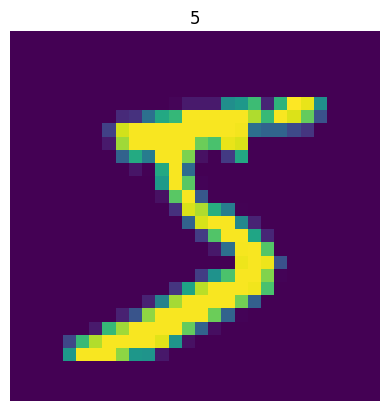

In [ ]:
import matplotlib.pyplot as plt

# Access data using indexing instead of calling the dataset object
train_images, train_labels = train_set[0]  # Changed from train_set(0) to train_set[0]

plt.title(train_labels)
plt.imshow(train_images) # Changed from train_images to train_image
plt.axis('off')
plt.show()

In [ ]:
print("데이터 타입:", type(train_images))
print("데이터 라벨:", type(train_labels))

데이터 타입: <class 'PIL.Image.Image'>
데이터 라벨: <class 'int'>


In [ ]:
import torchvision.transforms as transforms
transform = transforms.Compose([transforms.ToTensor()])

In [ ]:
train_set = datasets.MNIST(root=DATA_PATH, train=True, download=True, transform=transform)
print("data size:", len(train_set))

data size: 60000


In [ ]:
train_images, train_labels = train_set[0]
print("데이터 타입:", type(train_images))
print("데이터 라벨:", type(train_labels))

print("데이터 shape:", train_images.shape)
print("데이터 차원:", train_images.dim())
print("데이터 최소값:", train_images.min())
print("데이터 최대값:", train_images.max())

데이터 타입: <class 'torch.Tensor'>
데이터 라벨: <class 'int'>
데이터 shape: torch.Size([1, 28, 28])
데이터 차원: 3
데이터 최소값: tensor(0.)
데이터 최대값: tensor(1.)


In [ ]:
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(0.5, 0.5),
                                transforms.Lambda(lambda x: x.view(-1))])

In [ ]:
train_set = datasets.MNIST(root=DATA_PATH, train=True, download=True, transform=transform)
print("data size:", len(train_set))

data size: 60000


In [ ]:
train_images, train_labels = train_set[0]
print("데이터 타입:", type(train_images))
print("데이터 라벨:", type(train_labels))

print("데이터 shape:", train_images.shape)
print("데이터 차원:", train_images.dim())
print("데이터 최소값:", train_images.min())
print("데이터 최대값:", train_images.max())

데이터 타입: <class 'torch.Tensor'>
데이터 라벨: <class 'int'>
데이터 shape: torch.Size([784])
데이터 차원: 1
데이터 최소값: tensor(-1.)
데이터 최대값: tensor(1.)


In [ ]:
print(train_images)
print(train_labels)

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.00

In [ ]:
test_set = datasets.MNIST(root=DATA_PATH, train=False, download=True, transform=transform)
print("data size:", len(test_set))

data size: 10000


In [ ]:
from torch.utils.data import DataLoader

batch_size = 256
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)
print("학습데이터 배치 개수:", len(train_loader))

학습데이터 배치 개수: 235


In [ ]:
for images, labels in train_loader:
    break
print(images.shape)
print(labels.shape)
print(images)
print(labels)

torch.Size([256, 784])
torch.Size([256])
tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]])
tensor([9, 8, 8, 9, 4, 5, 4, 8, 0, 4, 7, 1, 8, 8, 2, 5, 5, 5, 0, 3, 5, 9, 3, 0,
        5, 3, 1, 9, 7, 9, 1, 6, 3, 1, 1, 8, 5, 9, 3, 0, 6, 0, 3, 9, 9, 1, 3, 7,
        4, 8, 8, 6, 1, 4, 7, 3, 4, 3, 7, 1, 9, 6, 8, 7, 8, 4, 7, 9, 6, 8, 0, 8,
        1, 2, 1, 7, 3, 2, 8, 6, 6, 7, 1, 4, 1, 2, 5, 8, 1, 0, 2, 4, 7, 5, 3, 5,
        3, 9, 4, 3, 4, 3, 1, 7, 7, 4, 3, 5, 6, 4, 3, 2, 3, 3, 9, 8, 0, 7, 1, 5,
        2, 3, 2, 0, 7, 9, 6, 7, 6, 0, 8, 0, 6, 2, 9, 5, 2, 0, 0, 3, 1, 0, 8, 5,
        3, 3, 1, 8, 7, 9, 6, 8, 1, 8, 0, 4, 4, 6, 5, 7, 6, 3, 4, 6, 9, 9, 1, 3,
        3, 4, 6, 8, 6, 8, 1, 7, 3, 8, 1, 5, 8, 7, 8, 7, 5, 1, 3, 4, 3, 4, 4, 5,
        8, 3, 7, 5, 2, 2, 8, 

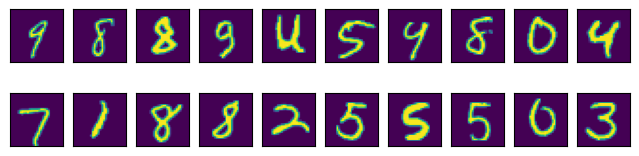

In [ ]:
plt.figure(figsize=(8,2))
for i in range(20):
    ax = plt.subplot(2,10,i + 1)
    image = images[i].numpy()
    lebel = labels[i]
    plt.imshow(image.reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_size = image.shape[0]
output_size = len(set(labels.numpy()))

print("입력 차원수:", input_size)
print("출력 차원수:", output_size)

입력 차원수: 784
출력 차원수: 10


In [ ]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self, input_size, output_size, hidden_size):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        y = self.l2(x2)
        return y

In [ ]:
hidden_size = 128
net = Net(input_size, output_size, hidden_size)
net = net.to(device)
print(net)

Net(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


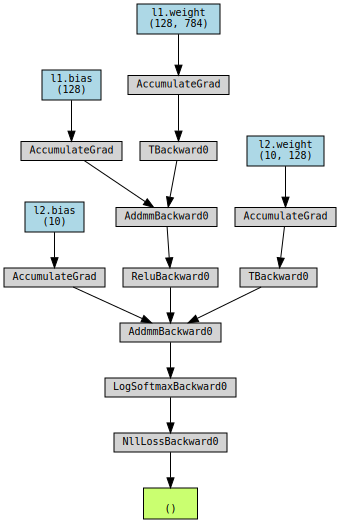

In [ ]:
#optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

for images, labels, in train_loader:
    break

X_train = images.to(device)
y_train = labels.to(device)

pred_train = net(X_train)
loss = criterion(pred_train, y_train)

!pip install torchviz
from torchviz import make_dot

g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [ ]:
import numpy as np
import torch.optim as optim

lr = 0.01

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)

num_epochs = 10

history = np.zeros((0,5))


In [ ]:
from tqdm import tqdm

for epoch in range(num_epochs):
    train_acc, train_loss = 0, 0
    test_acc, test_loss = 0, 0
    n_train, n_test = 0, 0

    for X_train, y_train in tqdm(train_loader):
        n_train += len(y_train)
        X_train = X_train.to(device)
        y_train = y_train.to(device)

        pred_train = net(X_train)
        loss_train = criterion(pred_train, y_train)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        result_train = torch.max(pred_train, 1)[1]

        train_loss += loss_train.item()
        train_acc += (result_train == y_train).sum().item()

    for X_test, y_test in test_loader:
        n_test += len(y_test)
        X_test = X_test.to(device)
        y_test = y_test.to(device)

        pred_test = net(X_test)
        loss_test = criterion(pred_test, y_test)
        result_test = torch.max(pred_test, 1)[1]

        test_loss += loss_test.item()
        test_acc += (result_test == y_test).sum().item()

    train_acc = train_acc / n_train
    test_acc = test_acc / n_test
    train_loss = train_loss * batch_size / n_train
    test_loss = test_loss * batch_size / n_test
    print(f'Epoch [{epoch+1}/{num_epochs}], loss:{train_loss:.5f} acc:{train_acc:.5f} val_loss:{test_loss:.5f}, val_acc:{test_acc:.5f}')
    item = np.array([epoch+1, train_loss, train_acc, test_loss, test_acc])
    history = np.vstack((history, item))



100%|██████████| 235/235 [00:21<00:00, 10.95it/s]


Epoch [1/10], loss:1.39606 acc:0.68098 val_loss:0.80129, val_acc:0.84310


100%|██████████| 235/235 [00:14<00:00, 16.05it/s]


Epoch [2/10], loss:0.63720 acc:0.85395 val_loss:0.52214, val_acc:0.87420


100%|██████████| 235/235 [00:14<00:00, 16.75it/s]


Epoch [3/10], loss:0.48277 acc:0.87560 val_loss:0.43504, val_acc:0.88510


100%|██████████| 235/235 [00:14<00:00, 16.18it/s]


Epoch [4/10], loss:0.42214 acc:0.88533 val_loss:0.39105, val_acc:0.89400


100%|██████████| 235/235 [00:15<00:00, 15.46it/s]


Epoch [5/10], loss:0.38942 acc:0.89187 val_loss:0.36489, val_acc:0.89860


100%|██████████| 235/235 [00:14<00:00, 16.18it/s]


Epoch [6/10], loss:0.36716 acc:0.89715 val_loss:0.34854, val_acc:0.90240


100%|██████████| 235/235 [00:14<00:00, 16.23it/s]


Epoch [7/10], loss:0.35169 acc:0.90118 val_loss:0.33377, val_acc:0.90670


100%|██████████| 235/235 [00:14<00:00, 16.24it/s]


Epoch [8/10], loss:0.33956 acc:0.90417 val_loss:0.32363, val_acc:0.90920


100%|██████████| 235/235 [00:14<00:00, 16.20it/s]


Epoch [9/10], loss:0.32899 acc:0.90648 val_loss:0.31484, val_acc:0.91210


100%|██████████| 235/235 [00:14<00:00, 16.06it/s]


Epoch [10/10], loss:0.32024 acc:0.90885 val_loss:0.30851, val_acc:0.91560


In [ ]:
print(history)

[[ 1.          1.39605937  0.68098333  0.80128991  0.8431    ]
 [ 2.          0.63720031  0.85395     0.5221387   0.8742    ]
 [ 3.          0.48276844  0.8756      0.43504072  0.8851    ]
 [ 4.          0.42214063  0.88533333  0.39105     0.894     ]
 [ 5.          0.38942487  0.89186667  0.36488724  0.8986    ]
 [ 6.          0.36715775  0.89715     0.34854119  0.9024    ]
 [ 7.          0.35169156  0.90118333  0.33377073  0.9067    ]
 [ 8.          0.33956102  0.90416667  0.32363245  0.9092    ]
 [ 9.          0.32898866  0.90648333  0.31483565  0.9121    ]
 [10.          0.32023815  0.90885     0.30850829  0.9156    ]]


In [ ]:
print('Test Data 평가결과')
print(f'초기상태 > 손실값: {history[0,3]:.5f} 정확도:{history[0,4]:.5f}')
print(f'최종상태 > 손실값: {history[-1,3]:.5f} 정확도:{history[-1,4]:.5f}')

Test Data 평가결과
초기상태 > 손실값: 0.80129 정확도:0.84310
최종상태 > 손실값: 0.30851 정확도:0.91560


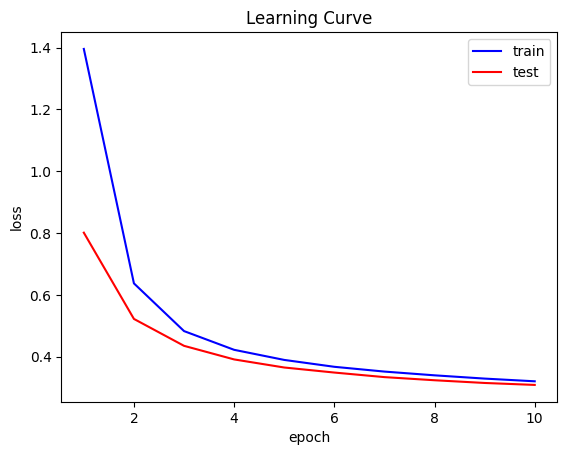

In [ ]:
plt.plot(history[:,0], history[:,1], 'blue', label='train')
plt.plot(history[:,0], history[:,3], 'red', label='test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

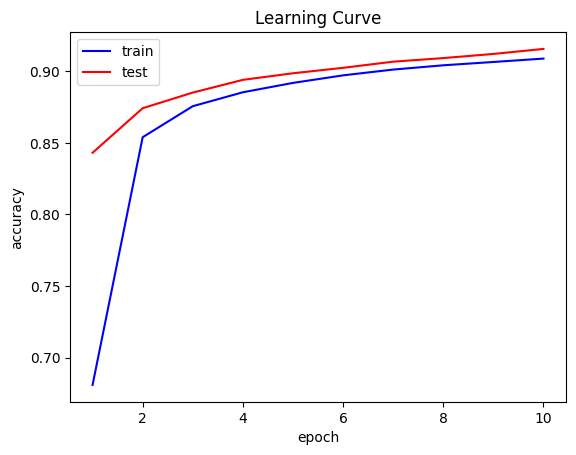

In [ ]:
plt.plot(history[:,0], history[:,2], 'blue', label='train')
plt.plot(history[:,0], history[:,4], 'red', label='test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [ ]:
for images, labels in test_loader:
    break

inputs = images.to(device)
labels = labels.to(device)

outputs = net(inputs)
predicted = torch.max(outputs, 1)[1]
print(predicted)

tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 4, 2, 7, 4, 6, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 7, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4,
        1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 1, 3, 9, 7, 4, 4, 4, 9, 2,
        5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1,
        7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5,
        1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1,
        0, 3, 0, 5, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0,
        3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1,
        5, 8, 8, 7, 2, 5, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7], device='cuda:0')


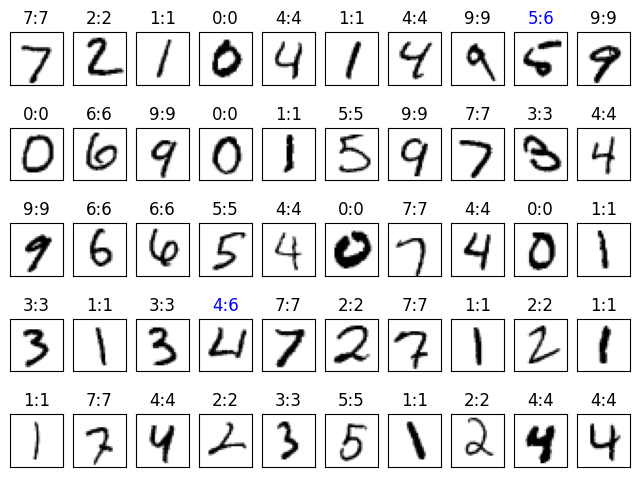

In [ ]:
plt.figure(figsize=(8,6))
for i in range(50):
    ax = plt.subplot(5,10,i + 1)
    image = images[i]
    label = labels[i]
    pred = predicted[i]
    if (pred == label):
        color = 'black'
    else:
        color = 'blue'

    plt.imshow(image.reshape(28,28),cmap='gray_r')
    ax.set_title(f'{label}:{pred}',c=color)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()